In [31]:
import pandas as pd
import numpy as np

# Cargar los datos
dat_csv = pd.read_csv('Clima-rg-Mes.csv', encoding="ISO-8859-1", delimiter=";")

# Crear un diccionario de mapeo para los meses
meses_map = {
    'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6,
    'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
}

# Reemplazar los nombres de los meses por sus respectivos números
dat_csv['mes'] = dat_csv['mes'].map(meses_map)

# Verificar los primeros registros de la columna 'mes' para asegurar que la conversión fue correcta
print(dat_csv[['mes']].head())



   mes
0    1
1    2
2    3
3    4
4    5


In [41]:
# Reemplazar los guiones y los guiones seguidos de un espacio por ceros en la columna 'Dias con Nieve'
dat_csv['Dias con Nieve'] = dat_csv['Dias con Nieve'].replace(['-', '- -'], 0)

# Verificar los primeros registros de la columna 'Dias con Nieve'
print(dat_csv[['Dias con Nieve']].head())



  Dias con Nieve
0              0
1              0
2              0
3              0
4              1


In [42]:
# Verificar si hay valores nulos en las columnas 'mes' y 'Dias con Nieve'
nulos_mes = dat_csv['mes'].isnull().sum()
nulos_dias_con_nieve = dat_csv['Dias con Nieve'].isnull().sum()

# Mostrar la cantidad de valores nulos en ambas columnas
print(f"Valores nulos en 'mes': {nulos_mes}")
print(f"Valores nulos en 'Dias con Nieve': {nulos_dias_con_nieve}")


Valores nulos en 'mes': 0
Valores nulos en 'Dias con Nieve': 0


In [43]:
# Verificar si quedan guiones o valores no numéricos en la columna 'Dias con Nieve'
print("Valores únicos en 'Dias con Nieve':", dat_csv['Dias con Nieve'].unique())

# Verificar si quedan guiones específicamente
guiones_en_dias_con_nieve = dat_csv[dat_csv['Dias con Nieve'] == '-']
print(f"Cantidad de guiones en 'Dias con Nieve': {guiones_en_dias_con_nieve.shape[0]}")


Valores únicos en 'Dias con Nieve': [0 '1' '3' '6' '5' '2' '4' '7' '8' '13']
Cantidad de guiones en 'Dias con Nieve': 0


Error cuadrático medio (MSE): 4.6951644784498745
Coeficiente de regresión: [0.06887221]
Intercepto: 0.7574411599530302


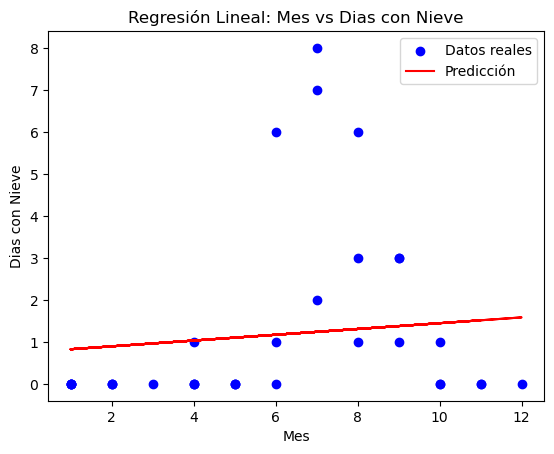

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Dividir los datos en variables independientes (X) y dependientes (y)
X = dat_csv[['mes']]  # Variable independiente: mes
y = dat_csv['Dias con Nieve']  # Variable dependiente: Dias con Nieve

# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo usando el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

# Mostrar los coeficientes del modelo
print(f"Coeficiente de regresión: {model.coef_}")
print(f"Intercepto: {model.intercept_}")

# Graficar los resultados
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicción')
plt.xlabel('Mes')
plt.ylabel('Dias con Nieve')
plt.title('Regresión Lineal: Mes vs Dias con Nieve')
plt.legend()
plt.show()

In [48]:
# Crear un DataFrame con el mes 5 (como fue hecho durante el entrenamiento)
mes_5 = pd.DataFrame([[5]], columns=['mes'])  # Crear DataFrame con la columna 'mes'

# Realizar la predicción con el modelo de regresión lineal
dias_con_nieve_mes_5 = model.predict(mes_5)

print(f"Predicción de días con nieve para el mes 5: {dias_con_nieve_mes_5[0]}")


Predicción de días con nieve para el mes 5: 1.101802215755348
